<a href="https://colab.research.google.com/github/RTae/CPE463/blob/main/week7/group_discusstion/CPE463_Code_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [321]:
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt

In [343]:
# Helper Function

def random_color():
    r = random.choice([i for i in range(0,255)])
    g = random.choice([i for i in range(0,255)])
    b = random.choice([i for i in range(0,255)])
    
    return (r,g,b)

In [310]:
img_origin = cv2.imread("./bag.png")
img_origin = cv2.cvtColor(img_origin, cv2.COLOR_BGR2RGB)

img_origin_gray = cv2.cvtColor(img_origin, cv2.COLOR_BGR2GRAY)
ret, img_origin_gray = cv2.threshold(img_origin_gray, 127, 255, 0)

img = img_origin_gray.copy()

In [311]:
kernel_closing = np.ones((3,3),np.uint8)

# Closing
img = cv2.dilate(img,kernel_closing,iterations = 1)
img = cv2.erode(img,kernel_closing,iterations = 1)

kernel_erode = np.ones((2,2),np.uint8)
img = cv2.erode(img,kernel_erode,iterations = 1)

In [346]:
contours, hierarchy = cv2.findContours(img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [347]:
# Filter only lower half
temp_contour = []
for contour in contours:
  if len(contour) > 23 and  len(contour) < 138:
    temp_contour.append(contour)

img_draw = img.copy()
img_draw = cv2.cvtColor(img_draw, cv2.COLOR_GRAY2RGB)

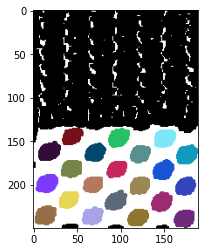

In [348]:
for contour in temp_contour:
  img_draw = cv2.fillPoly(img_draw, pts = [contour], color= random_color())

plt.imshow(img_draw)